<a href="https://colab.research.google.com/github/georginamihailova/Flights-Price-Prediction---EDA-and-Feature-Engineering-/blob/main/EDA_and_Feature_Engineering_Flights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Flight Dataset EDA

In [2]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [159]:
df = pd.read_csv("/content/drive/MyDrive/data mining/laboratory_exercises/datasets/flights_train.csv")

In [90]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [91]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [93]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [94]:
df.shape

(10683, 11)

In [95]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [160]:
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [161]:
df[df['Source'] == "Delhi"]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625
10,Air India,1/06/2019,Delhi,Cochin,DEL ? BLR ? COK,09:45,23:00,13h 15m,1 stop,No info,8907
15,Air India,3/03/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,16:40,19:15 04 Mar,26h 35m,2 stops,No info,14011
16,SpiceJet,15/04/2019,Delhi,Cochin,DEL ? PNQ ? COK,08:45,13:15,4h 30m,1 stop,No info,5830
...,...,...,...,...,...,...,...,...,...,...,...
10669,Air India,15/06/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,19:15,11h 15m,1 stop,No info,9929
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150
10673,Jet Airways,27/05/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,13:25,04:25 28 May,15h,2 stops,No info,16704
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL ? BOM ? COK,10:20,19:00,8h 40m,1 stop,No info,9794


In [162]:
most_frequent_route = df[(df['Source'] == 'Delhi') & (df['Destination'] == 'Cochin')]['Route'].mode().iloc[0]

df.loc[df['Route'].isnull(), 'Route'] = most_frequent_route

In [163]:
df.Route.isnull().sum()

0

In [164]:
df.loc[df['Total_Stops'].isnull(), 'Total_Stops'] = '3 stops'

In [101]:
df.Total_Stops.isnull().sum()

0

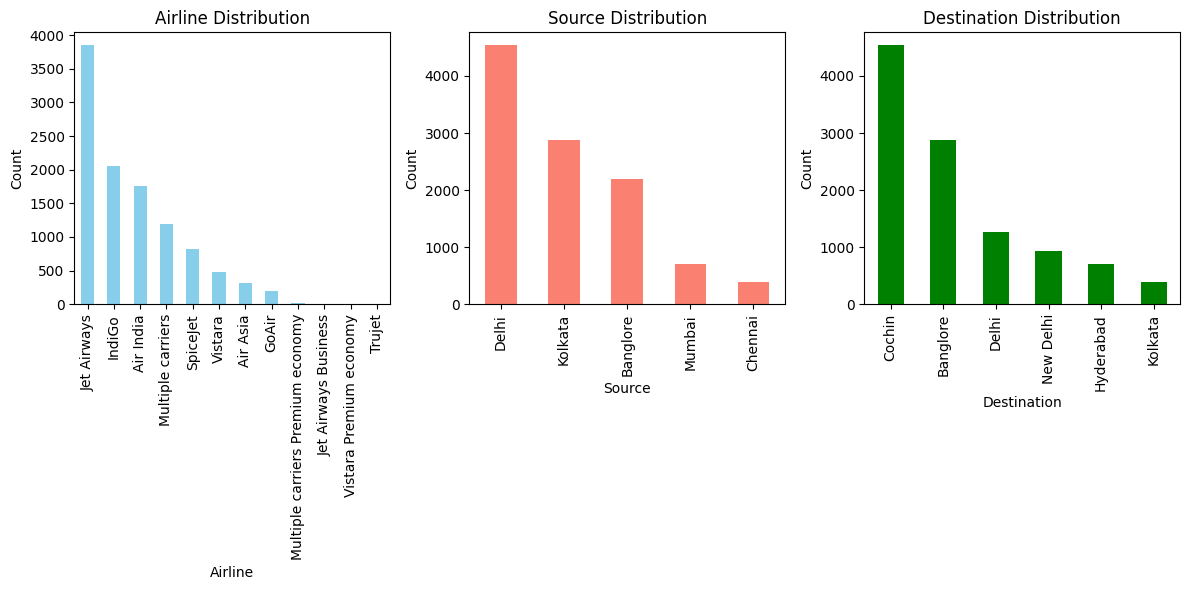

In [102]:
plt.figure(figsize=(12, 6))


plt.subplot(131)
df.Airline.value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Airline Distribution')


plt.subplot(132)
df.Source.value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Source Distribution')


plt.subplot(133)
df.Destination.value_counts().plot(kind='bar', color='green')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Destination Distribution')

plt.tight_layout()
plt.show()


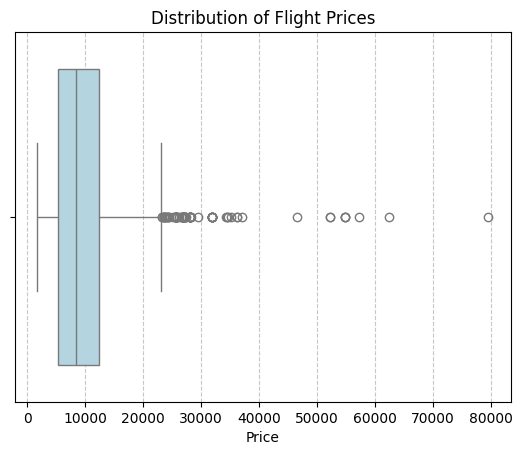

In [103]:
sns.boxplot(x='Price', data=df, color='lightblue')
plt.xlabel('Price')
plt.title('Distribution of Flight Prices')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

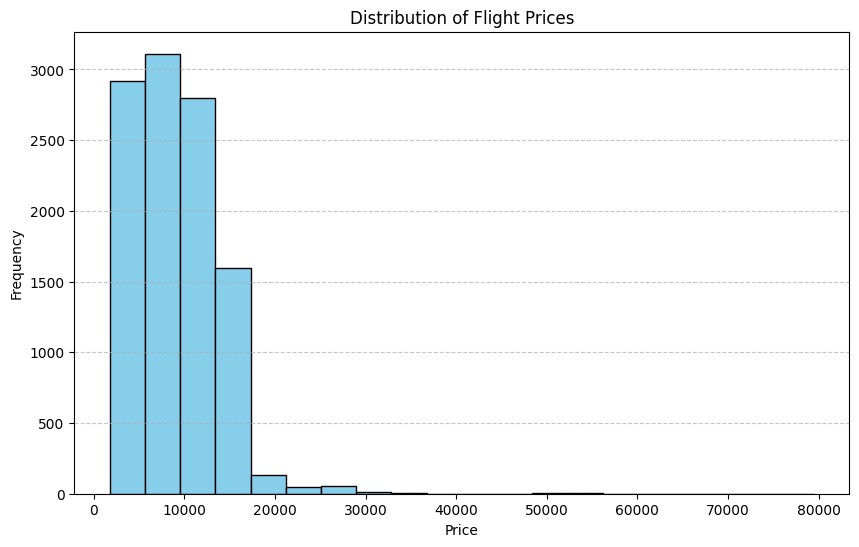

In [104]:
plt.figure(figsize=(10, 6))
plt.hist(df.Price, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

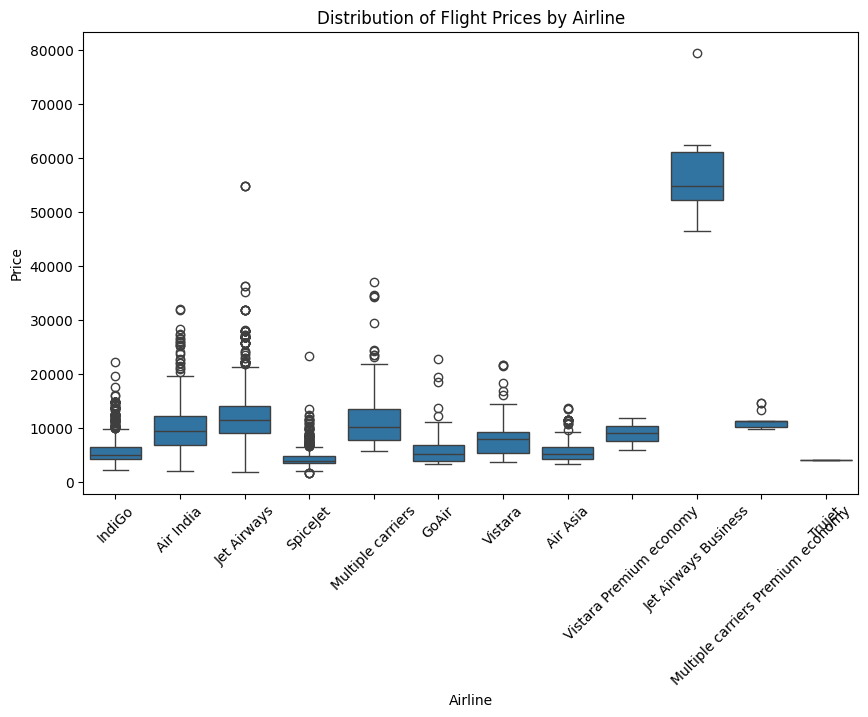

In [105]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Distribution of Flight Prices by Airline')
plt.xticks(rotation=45)
plt.show()

In [106]:
df.Date_of_Journey.unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

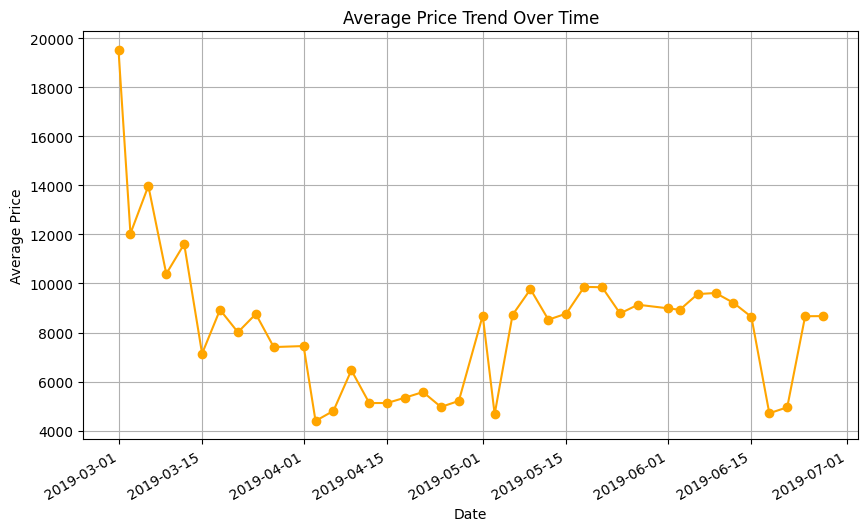

In [165]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
plt.figure(figsize=(10, 6))
df.groupby('Date_of_Journey')['Price'].mean().plot(marker='o', color='orange')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price Trend Over Time')
plt.grid()
plt.show()

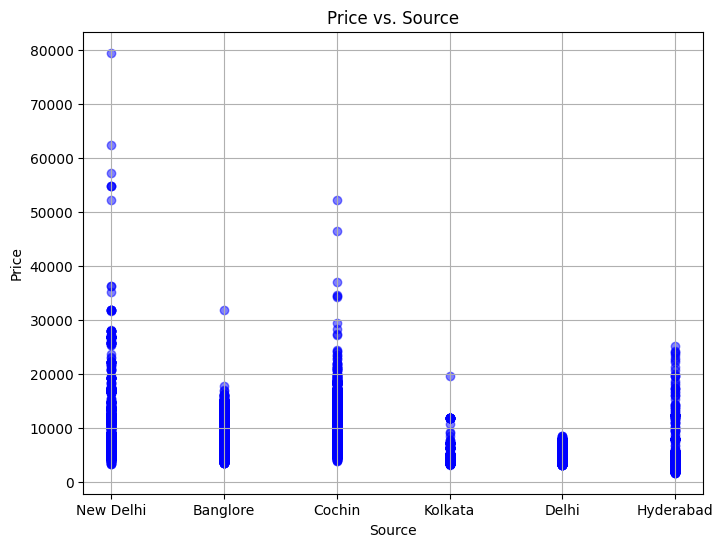

In [166]:
plt.figure(figsize=(8, 6))
plt.scatter(df.Destination, df.Price, alpha=0.5, color='blue')
plt.xlabel('Source')
plt.ylabel('Price')
plt.title('Price vs. Source')
plt.grid()
plt.show()


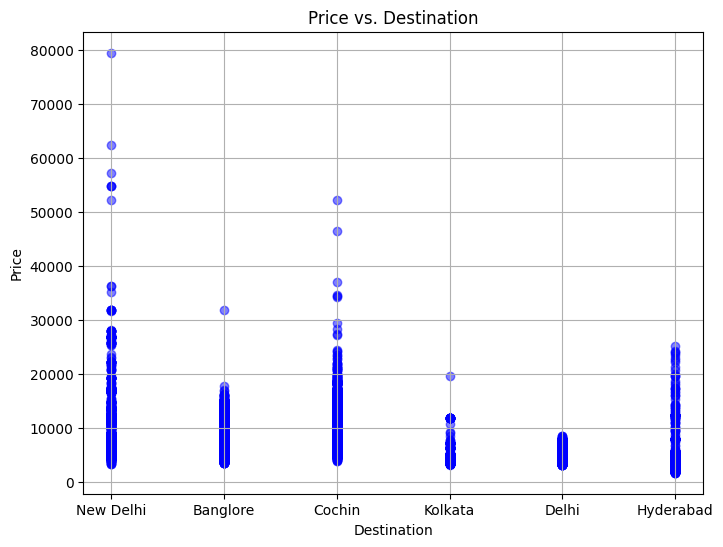

In [108]:
plt.figure(figsize=(8, 6))
plt.scatter(df.Destination, df.Price, alpha=0.5, color='blue')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.title('Price vs. Destination')
plt.grid()
plt.show()


In [109]:
df.Duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object

In [167]:
def duration_to_minutes(duration):
    parts = duration.split()
    total_minutes = 0
    for part in parts:
        if 'h' in part:
            total_minutes += int(part[:-1]) * 60
        elif 'm' in part:
            total_minutes += int(part[:-1])
    return total_minutes
df['Duration'] = df['Duration'].apply(duration_to_minutes)

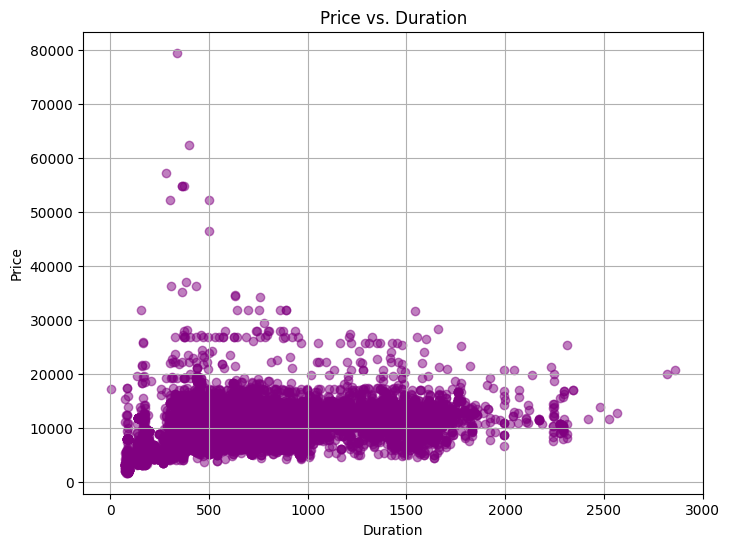

In [168]:
plt.figure(figsize=(8, 6))
plt.scatter(df.Duration, df.Price, alpha=0.5, color='purple')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Price vs. Duration')
plt.grid()
plt.show()


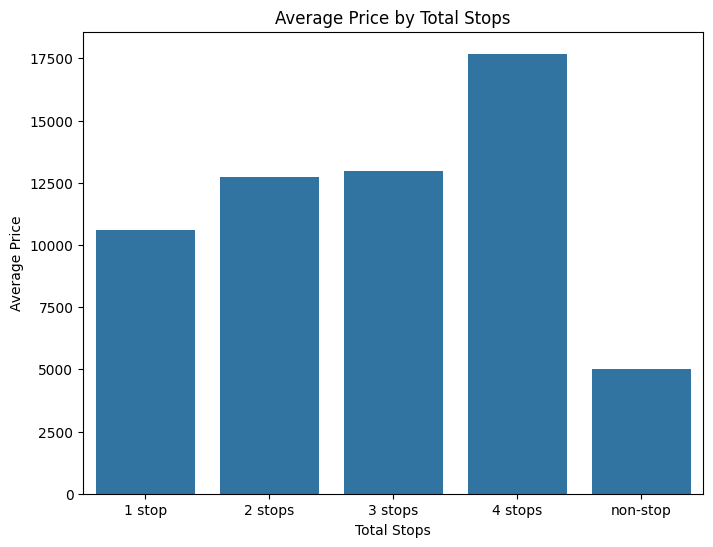

In [169]:
avgByStops = df.groupby('Total_Stops')['Price'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Total_Stops', y='Price', data=avgByStops)
plt.xlabel('Total Stops')
plt.ylabel('Average Price')
plt.title('Average Price by Total Stops')
plt.show()


In [170]:
df['Date_of_Journey'] = df['Date_of_Journey'].dt.strftime("%m/%d/%Y")
df['Day'] = df.Date_of_Journey.str.split('/').str[0]
df['Month'] = df.Date_of_Journey.str.split('/').str[1]
df['Year'] = df.Date_of_Journey.str.split('/').str[2]

In [117]:
df['Day']

0        03
1        05
2        06
3        05
4        03
         ..
10678    04
10679    04
10680    04
10681    03
10682    05
Name: Day, Length: 10683, dtype: object

In [118]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,03/24/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,03,24,2019
1,Air India,05/01/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2 stops,No info,7662,05,01,2019
2,Jet Airways,06/09/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,06,09,2019
3,IndiGo,05/12/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1 stop,No info,6218,05,12,2019
4,IndiGo,03/01/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1 stop,No info,13302,03,01,2019


In [171]:
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  int64 
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Day              10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 1.1+ MB


In [173]:
df = df.drop('Date_of_Journey', axis = 1)

In [174]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,3,24,2019


In [123]:
df.Arrival_Time

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [175]:
df.Arrival_Time = df.Arrival_Time.str.split(' ').str[0]

In [176]:
df.Arrival_Time

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [177]:
df['Arrival_hour'] = df.Arrival_Time.str.split(':').str[0]
df['Arrival_minutes'] = df.Arrival_Time.str.split(':').str[1]

In [178]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10,170,non-stop,No info,3897,3,24,2019,01,10


In [179]:
df['Arrival_hour'] = df['Arrival_hour'].astype(int)
df['Arrival_minutes'] = df['Arrival_minutes'].astype(int)

In [180]:
df.Arrival_hour.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10683 entries, 0 to 10682
Series name: Arrival_hour
Non-Null Count  Dtype
--------------  -----
10683 non-null  int64
dtypes: int64(1)
memory usage: 83.6 KB


In [181]:
df = df.drop('Arrival_Time', axis = 1)

In [182]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,170,non-stop,No info,3897,3,24,2019,1,10


In [183]:
df['Dep_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_minutes'] = df['Dep_Time'].str.split(':').str[1]

In [184]:
df['Dep_hour'] = df['Dep_hour'].astype(int)
df['Dep_minutes'] = df['Dep_minutes'].astype(int)

In [185]:
df = df.drop('Dep_Time', axis = 1)

In [186]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR ? DEL,170,non-stop,No info,3897,3,24,2019,1,10,22,20


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10683 non-null  object
 4   Duration         10683 non-null  int64 
 5   Total_Stops      10683 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Day              10683 non-null  int64 
 9   Month            10683 non-null  int64 
 10  Year             10683 non-null  int64 
 11  Arrival_hour     10683 non-null  int64 
 12  Arrival_minutes  10683 non-null  int64 
 13  Dep_hour         10683 non-null  int64 
 14  Dep_minutes      10683 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.2+ MB


In [188]:
df.Route

0                    BLR ? DEL
1        CCU ? IXR ? BBI ? BLR
2        DEL ? LKO ? BOM ? COK
3              CCU ? NAG ? BLR
4              BLR ? NAG ? DEL
                 ...          
10678                CCU ? BLR
10679                CCU ? BLR
10680                BLR ? DEL
10681                BLR ? DEL
10682    DEL ? GOI ? BOM ? COK
Name: Route, Length: 10683, dtype: object

In [189]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [190]:
df.Total_Stops = df.Total_Stops.map({'non-stop':0, '1 stop': 1, '2 stops': 2, '3 stops': 3,'4 stops': 4})

In [191]:
df.Total_Stops

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10683, dtype: int64

In [192]:
df = df.drop('Route',axis = 1)

In [193]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,3,24,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,6,9,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,5,12,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,3,1,2019,21,35,16,50


In [194]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [195]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.Airline = encoder.fit_transform(df.Airline)

In [196]:
df.Airline.unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

In [197]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [198]:
df.Source = encoder.fit_transform(df.Source)

In [199]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [200]:
df.Destination = encoder.fit_transform(df.Destination)

In [201]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [202]:
df.Additional_Info = df.Additional_Info.replace('No Info', 'No info')


In [203]:
df.Additional_Info = encoder.fit_transform(df.Additional_Info)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  int64
 1   Source           10683 non-null  int64
 2   Destination      10683 non-null  int64
 3   Duration         10683 non-null  int64
 4   Total_Stops      10683 non-null  int64
 5   Additional_Info  10683 non-null  int64
 6   Price            10683 non-null  int64
 7   Day              10683 non-null  int64
 8   Month            10683 non-null  int64
 9   Year             10683 non-null  int64
 10  Arrival_hour     10683 non-null  int64
 11  Arrival_minutes  10683 non-null  int64
 12  Dep_hour         10683 non-null  int64
 13  Dep_minutes      10683 non-null  int64
dtypes: int64(14)
memory usage: 1.1 MB


In [205]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes
0,3,0,5,170,0,7,3897,3,24,2019,1,10,22,20
1,1,3,0,445,2,7,7662,5,1,2019,13,15,5,50
2,4,2,1,1140,2,7,13882,6,9,2019,4,25,9,25
3,3,3,0,325,1,7,6218,5,12,2019,23,30,18,5
4,3,0,5,285,1,7,13302,3,1,2019,21,35,16,50


In [206]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Day                0
Month              0
Year               0
Arrival_hour       0
Arrival_minutes    0
Dep_hour           0
Dep_minutes        0
dtype: int64

In [207]:
df.Total_Stops.unique()

array([0, 2, 1, 3, 4])

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  int64
 1   Source           10683 non-null  int64
 2   Destination      10683 non-null  int64
 3   Duration         10683 non-null  int64
 4   Total_Stops      10683 non-null  int64
 5   Additional_Info  10683 non-null  int64
 6   Price            10683 non-null  int64
 7   Day              10683 non-null  int64
 8   Month            10683 non-null  int64
 9   Year             10683 non-null  int64
 10  Arrival_hour     10683 non-null  int64
 11  Arrival_minutes  10683 non-null  int64
 12  Dep_hour         10683 non-null  int64
 13  Dep_minutes      10683 non-null  int64
dtypes: int64(14)
memory usage: 1.1 MB
